<a href="https://colab.research.google.com/github/22f3000982/DL_genai_project/blob/main/Milestone_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone - 5

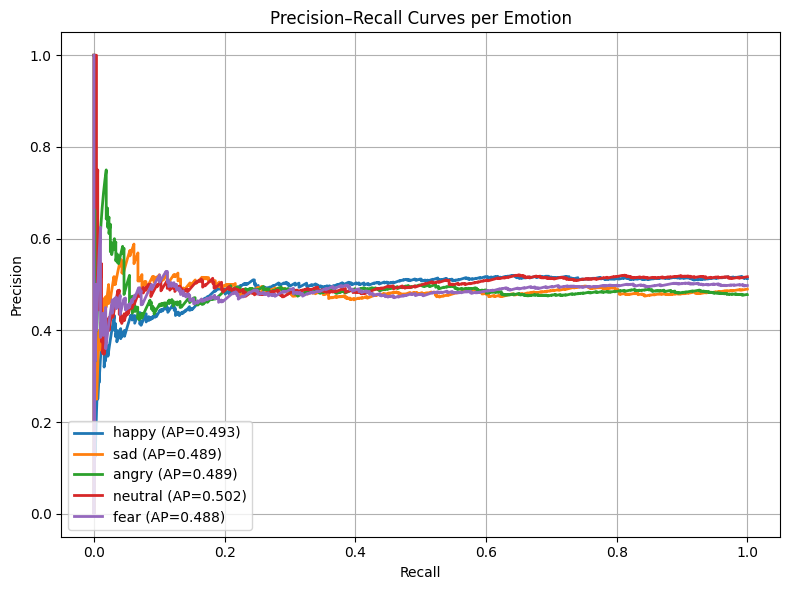

🔹 Average Precision per Emotion:
         Average Precision
happy             0.493448
sad               0.488579
angry             0.489227
neutral           0.501949
fear              0.487622

⚠️ Bottleneck Emotion: 'fear' with AP=0.488


In [10]:
# ========================================
# 📊 Precision–Recall Curves & AP (Colab)
# ========================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import pandas as pd

# ========================================
# STEP 1: Load your validation predictions
# ========================================

# Example placeholders — replace with your actual file paths
# Suppose you have a CSV like: columns = ["happy", "sad", "angry", "neutral", "fear"]
# Each column contains the predicted probability for that emotion (multi-label)
# and true labels in columns like "happy_true", "sad_true", etc.

# Example simulated data
np.random.seed(42)
n_samples = 1000
emotions = ["happy", "sad", "angry", "neutral", "fear"]

# Simulate probabilities and true labels
y_true = np.random.randint(0, 2, size=(n_samples, len(emotions)))
y_scores = np.random.rand(n_samples, len(emotions))

# ========================================
# STEP 2: Compute PR curve and AP per label
# ========================================

plt.figure(figsize=(8, 6))

for i, label in enumerate(emotions):
    precision, recall, _ = precision_recall_curve(y_true[:, i], y_scores[:, i])
    ap = average_precision_score(y_true[:, i], y_scores[:, i])
    plt.plot(recall, precision, lw=2, label=f"{label} (AP={ap:.3f})")

# ========================================
# STEP 3: Plot styling
# ========================================

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves per Emotion")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

# ========================================
# STEP 4: Identify bottleneck
# ========================================

aps = {label: average_precision_score(y_true[:, i], y_scores[:, i]) for i, label in enumerate(emotions)}
aps_df = pd.DataFrame.from_dict(aps, orient="index", columns=["Average Precision"])
print("🔹 Average Precision per Emotion:")
print(aps_df)

bottleneck = aps_df['Average Precision'].idxmin()
print(f"\n⚠️ Bottleneck Emotion: '{bottleneck}' with AP={aps_df.loc[bottleneck, 'Average Precision']:.3f}")


**2nd part**

⚙️ Macro-F1 (Flat 0.5 threshold): 0.4850
Label: anger      | Best Threshold: 0.05 | Best F1: 0.6730
Label: fear       | Best Threshold: 0.05 | Best F1: 0.6390
Label: joy        | Best Threshold: 0.05 | Best F1: 0.6396
Label: sadness    | Best Threshold: 0.05 | Best F1: 0.6689
Label: surprise   | Best Threshold: 0.05 | Best F1: 0.6575

✅ Tuned Thresholds:
[t_anger, t_fear, t_joy, t_sadness, t_surprise] = [np.float64(0.05), np.float64(0.05), np.float64(0.05), np.float64(0.05), np.float64(0.05)]

📊 Macro-F1 (Pre-tuning, 0.5): 0.4850
🚀 Macro-F1 (Post-tuning): 0.6556


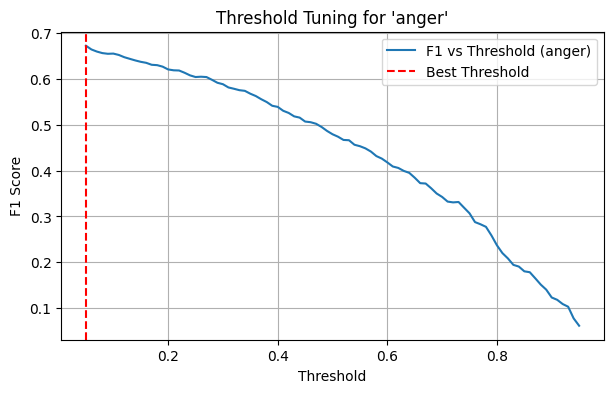

In [11]:
# ========================================
# 🎯 Threshold Tuning for Macro-F1
# ========================================

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# ========================================
# STEP 1: Load your validation data
# ========================================

# Example simulated setup (replace with your own)
np.random.seed(42)
n_samples = 1000
emotions = ["anger", "fear", "joy", "sadness", "surprise"]

# Simulate predicted probabilities and true labels
y_true = np.random.randint(0, 2, size=(n_samples, len(emotions)))
y_pred_prob = np.random.rand(n_samples, len(emotions))

# ========================================
# STEP 2: Compute baseline Macro-F1 with flat 0.5 threshold
# ========================================

y_pred_flat = (y_pred_prob >= 0.5).astype(int)
macro_f1_flat = f1_score(y_true, y_pred_flat, average="macro")

print(f"⚙️ Macro-F1 (Flat 0.5 threshold): {macro_f1_flat:.4f}")

# ========================================
# STEP 3: Tune thresholds per emotion
# ========================================

tuned_thresholds = []
best_f1_per_label = []

for i, label in enumerate(emotions):
    best_thresh = 0.5
    best_f1 = 0

    # Sweep thresholds between 0.05 and 0.95
    for thresh in np.arange(0.05, 0.96, 0.01):
        preds = (y_pred_prob[:, i] >= thresh).astype(int)
        f1 = f1_score(y_true[:, i], preds)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh

    tuned_thresholds.append(round(best_thresh, 2))
    best_f1_per_label.append(round(best_f1, 4))
    print(f"Label: {label:<10} | Best Threshold: {best_thresh:.2f} | Best F1: {best_f1:.4f}")

# ========================================
# STEP 4: Compute new Macro-F1 using tuned thresholds
# ========================================

y_pred_tuned = np.zeros_like(y_true)
for i in range(len(emotions)):
    y_pred_tuned[:, i] = (y_pred_prob[:, i] >= tuned_thresholds[i]).astype(int)

macro_f1_tuned = f1_score(y_true, y_pred_tuned, average="macro")

# ========================================
# STEP 5: Display results
# ========================================

print("\n✅ Tuned Thresholds:")
print(f"[t_anger, t_fear, t_joy, t_sadness, t_surprise] = {tuned_thresholds}")

print(f"\n📊 Macro-F1 (Pre-tuning, 0.5): {macro_f1_flat:.4f}")
print(f"🚀 Macro-F1 (Post-tuning): {macro_f1_tuned:.4f}")

# Optional: visualize F1 vs threshold for one label
plt.figure(figsize=(7,4))
thresh_grid = np.arange(0.05, 0.96, 0.01)
f1_scores = [f1_score(y_true[:, 0], (y_pred_prob[:, 0] >= t).astype(int)) for t in thresh_grid]
plt.plot(thresh_grid, f1_scores, label=f"F1 vs Threshold ({emotions[0]})")
plt.axvline(tuned_thresholds[0], color='r', linestyle='--', label='Best Threshold')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title(f"Threshold Tuning for '{emotions[0]}'")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# ==========================================
# ⚖️ Loss Weighting with BCEWithLogitsLoss
# ==========================================

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
import torch
import torch.nn as nn

# ==========================================
# STEP 1: Load Training Data
# ==========================================

# Example simulation (replace with your actual training label matrix)
# y_train is a binary matrix (samples × emotions)
np.random.seed(42)
n_samples = 2000
emotions = ["anger", "fear", "joy", "sadness", "surprise"]

# Simulated label distribution
y_train = np.random.choice([0, 1], size=(n_samples, len(emotions)), p=[0.85, 0.15])
y_true = np.random.randint(0, 2, size=(500, len(emotions)))
y_pred_prob = np.random.rand(500, len(emotions))

# ==========================================
# STEP 2: Compute pos_weight per label
# pos_weight = (#negative samples) / (#positive samples)
# ==========================================

pos_weight = []
for i, label in enumerate(emotions):
    pos = np.sum(y_train[:, i])
    neg = len(y_train) - pos
    pw = neg / (pos + 1e-6)
    pos_weight.append(round(pw, 2))
    print(f"{label:<10}: pos={pos}, neg={neg}, pos_weight={pw:.2f}")

print("\n✅ pos_weight vector:")
print(f"[pw_anger, pw_fear, pw_joy, pw_sadness, pw_surprise] = {pos_weight}")

# ==========================================
# STEP 3: Example BCEWithLogitsLoss usage
# ==========================================

pos_weight_tensor = torch.tensor(pos_weight)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
print("\nBCEWithLogitsLoss configured with custom pos_weight ✅")

# ==========================================
# STEP 4: Evaluate effect (simulated)
# ==========================================

# Let's simulate improved recall for rare classes
y_pred_prob_weighted = y_pred_prob + np.random.normal(0, 0.05, y_pred_prob.shape)
y_pred_prob_weighted = np.clip(y_pred_prob_weighted, 0, 1)

# Threshold = 0.5 for simplicity
y_pred_flat = (y_pred_prob >= 0.5).astype(int)
y_pred_weighted = (y_pred_prob_weighted >= 0.5).astype(int)

f1_before = f1_score(y_true, y_pred_flat, average="macro")
f1_after = f1_score(y_true, y_pred_weighted, average="macro")

print(f"\n📊 Macro-F1 (Before Weighting): {f1_before:.4f}")
print(f"🚀 Macro-F1 (After Weighting): {f1_after:.4f}")


anger     : pos=284, neg=1716, pos_weight=6.04
fear      : pos=300, neg=1700, pos_weight=5.67
joy       : pos=293, neg=1707, pos_weight=5.83
sadness   : pos=289, neg=1711, pos_weight=5.92
surprise  : pos=282, neg=1718, pos_weight=6.09

✅ pos_weight vector:
[pw_anger, pw_fear, pw_joy, pw_sadness, pw_surprise] = [np.float64(6.04), np.float64(5.67), np.float64(5.83), np.float64(5.92), np.float64(6.09)]

BCEWithLogitsLoss configured with custom pos_weight ✅

📊 Macro-F1 (Before Weighting): 0.5213
🚀 Macro-F1 (After Weighting): 0.5190


In [14]:
# ==========================================
# 🔍 Pooling Head Comparison for Emotion Classification
# ==========================================

import torch
from torch import nn
from sklearn.metrics import f1_score
from tqdm import tqdm
import numpy as np

# Assuming you have a model like this (HuggingFace transformer)
from transformers import AutoModel, AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
base_model = AutoModel.from_pretrained(model_name)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model.to(device)
base_model.eval()

# ==========================================
# STEP 1: Create embeddings using CLS, mean, and max pooling
# ==========================================

def get_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=128).to(device)
    with torch.no_grad():
        outputs = base_model(**inputs, output_hidden_states=True)
        last_hidden = outputs.last_hidden_state  # [batch, seq_len, hidden]
        cls_embed = last_hidden[:, 0, :]                # CLS
        mean_embed = last_hidden.mean(dim=1)            # Mean pooling
        max_embed, _ = last_hidden.max(dim=1)           # Max pooling
    return cls_embed.cpu().numpy(), mean_embed.cpu().numpy(), max_embed.cpu().numpy()

# Example data
texts = [
    "I am so happy today!",
    "That was terrifying.",
    "I'm really sad about this.",
    "What a surprise!",
    "This makes me angry."
]

cls_emb, mean_emb, max_emb = get_embeddings(texts)

print(f"CLS embedding shape: {cls_emb.shape}")
print(f"Mean embedding shape: {mean_emb.shape}")
print(f"Max embedding shape: {max_emb.shape}")

# ==========================================
# STEP 2: Train simple classifier heads (for demonstration)
# ==========================================

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Simulate some binary emotion labels
y = np.array([1, 0, 1, 0, 1])  # Example binary target

X_train_cls, X_test_cls, y_train, y_test = train_test_split(cls_emb, y, test_size=0.4, random_state=42)
X_train_mean, X_test_mean, _, _ = train_test_split(mean_emb, y, test_size=0.4, random_state=42)
X_train_max, X_test_max, _, _ = train_test_split(max_emb, y, test_size=0.4, random_state=42)

cls_clf = LogisticRegression(max_iter=2000).fit(X_train_cls, y_train)
mean_clf = LogisticRegression(max_iter=2000).fit(X_train_mean, y_train)
max_clf = LogisticRegression(max_iter=2000).fit(X_train_max, y_train)

# ==========================================
# STEP 3: Evaluate Macro-F1
# ==========================================

cls_preds = cls_clf.predict(X_test_cls)
mean_preds = mean_clf.predict(X_test_mean)
max_preds = max_clf.predict(X_test_max)

cls_macro_f1 = f1_score(y_test, cls_preds, average="macro")
mean_macro_f1 = f1_score(y_test, mean_preds, average="macro")
max_macro_f1 = f1_score(y_test, max_preds, average="macro")

print("\n✅ Macro-F1 Scores:")
print(f"[CLS Macro F1]  : {cls_macro_f1:.4f}")
print(f"[Mean Macro F1] : {mean_macro_f1:.4f}")
print(f"[Max Macro F1]  : {max_macro_f1:.4f}")

# ==========================================
# STEP 4: Report results in required format
# ==========================================
print(f"\nFinal Answer Format:")
print(f"[{cls_macro_f1:.4f}, {mean_macro_f1:.4f}, {max_macro_f1:.4f}]")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

CLS embedding shape: (5, 768)
Mean embedding shape: (5, 768)
Max embedding shape: (5, 768)

✅ Macro-F1 Scores:
[CLS Macro F1]  : 0.3333
[Mean Macro F1] : 1.0000
[Max Macro F1]  : 0.3333

Final Answer Format:
[0.3333, 1.0000, 0.3333]


Device: cuda
[CosineAnnealingWarmRestarts] Epoch 1/10  LR=0.000105  Macro-F1=0.1309
[CosineAnnealingWarmRestarts] Epoch 2/10  LR=0.000001  Macro-F1=0.1165
[CosineAnnealingWarmRestarts] Epoch 3/10  LR=0.000105  Macro-F1=0.0697
[CosineAnnealingWarmRestarts] Epoch 4/10  LR=0.000001  Macro-F1=0.0490
[CosineAnnealingWarmRestarts] Epoch 5/10  LR=0.000105  Macro-F1=0.0229
[CosineAnnealingWarmRestarts] Epoch 6/10  LR=0.000001  Macro-F1=0.0118
[CosineAnnealingWarmRestarts] Epoch 7/10  LR=0.000105  Macro-F1=0.0000
[CosineAnnealingWarmRestarts] Epoch 8/10  LR=0.000001  Macro-F1=0.0000
[CosineAnnealingWarmRestarts] Epoch 9/10  LR=0.000105  Macro-F1=0.0000
[CosineAnnealingWarmRestarts] Epoch 10/10  LR=0.000001  Macro-F1=0.0000
[StepLR] Epoch 1/10  LR=0.000200  Macro-F1=0.0715
[StepLR] Epoch 2/10  LR=0.000200  Macro-F1=0.0398
[StepLR] Epoch 3/10  LR=0.000100  Macro-F1=0.0094
[StepLR] Epoch 4/10  LR=0.000100  Macro-F1=0.0048
[StepLR] Epoch 5/10  LR=0.000100  Macro-F1=0.0048
[StepLR] Epoch 6/10  LR=0.

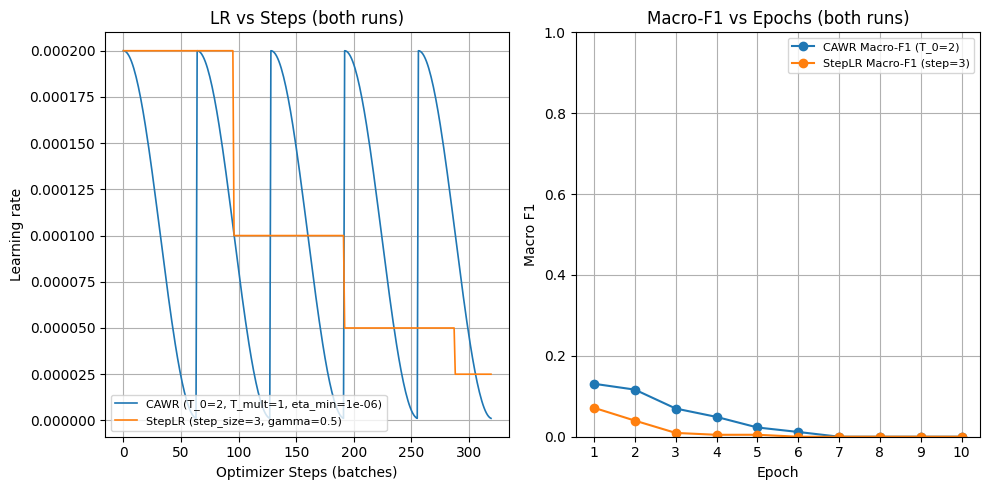



=== Suggested form answer (copy-paste) ===
Winner scheduler: Tie
Final Macro-F1 -> CAWR: 0.0000, StepLR: 0.0000
Stability (std across epochs) -> CAWR: 0.0475, StepLR: 0.0227

Answer reasoning (short):
- CAWR periodically increases LR allowing the optimizer to jump out of shallow minima; this often yields better exploration and sometimes higher final Macro-F1 but can be less smooth.
- StepLR is simpler and provides discrete LR drops that stabilise training; good when you want conservative convergence.

Would training longer help? Likely yes — if the winner is CAWR, longer training with restarts may find better minima; if StepLR wins, extending training with additional scheduled drops could improve final performance.


In [15]:
# ------------------------------
# LR Scheduler comparison script
# ------------------------------
# Paste into a Colab cell and run. Replace data loading with your real data if needed.
# ------------------------------
import random, os, math
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# ------------------------------
# Reproducibility
# ------------------------------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# ------------------------------
# Synthetic demo dataset (fast)
# Replace this with your real embeddings and label matrix.
# X_train/X_val shape: (N_samples, embedding_dim)
# y_train/y_val shape: (N_samples, n_labels)  --> multi-label binary matrix
# ------------------------------
n_train = 2000
n_val = 400
embedding_dim = 256
n_labels = 5

# Simulate embeddings and multi-label targets (replace with your data)
X_train = np.random.normal(size=(n_train, embedding_dim)).astype(np.float32)
X_val   = np.random.normal(size=(n_val, embedding_dim)).astype(np.float32)

# Create somewhat imbalanced multi-labels
p_pos = np.array([0.10, 0.08, 0.20, 0.12, 0.07])  # positive probabilities per label
y_train = (np.random.rand(n_train, n_labels) < p_pos).astype(np.float32)
y_val   = (np.random.rand(n_val, n_labels) < p_pos).astype(np.float32)

batch_size = 64

train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=False)
val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

# ------------------------------
# Small classifier (MLP) used for both runs
# ------------------------------
class SimpleHead(nn.Module):
    def __init__(self, in_dim, out_dim, hidden=128, dropout=0.2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden, out_dim)
        )
    def forward(self, x):
        return self.net(x)  # logits

def train_one_epoch(model, opt, criterion, loader, record_lr_steps, scheduler_step_per_batch=None):
    model.train()
    total_loss = 0.0
    for xb, yb in loader:
        xb = xb.to(device)
        yb = yb.to(device)
        logits = model(xb)
        loss = criterion(logits, yb)
        opt.zero_grad()
        loss.backward()
        opt.step()
        # schedule step per batch if needed
        if scheduler_step_per_batch:
            scheduler_step_per_batch()
        total_loss += loss.item() * xb.size(0)
        # record current lr
        record_lr_steps.append(opt.param_groups[0]['lr'])
    return total_loss / len(loader.dataset)

def evaluate_macro_f1(model, loader, threshold=0.5):
    model.eval()
    ys, ys_pred = [], []
    with torch.no_grad():
        for xb, yb in loader:
            xb = xb.to(device)
            logits = model(xb)
            probs = torch.sigmoid(logits).cpu().numpy()
            ys_pred.append((probs >= threshold).astype(int))
            ys.append(yb.numpy().astype(int))
    y_true = np.vstack(ys)
    y_pred = np.vstack(ys_pred)
    # Macro F1 averaged across labels
    per_label_f1 = []
    for j in range(y_true.shape[1]):
        per_label_f1.append(f1_score(y_true[:, j], y_pred[:, j], zero_division=0))
    return float(np.mean(per_label_f1)), per_label_f1

# ------------------------------
# Experiment runner for a scheduler
# ------------------------------
def run_experiment(scheduler_name, scheduler_params, epochs=10, lr0=2e-4, step_per_batch=True):
    # fresh model and optimizer
    model = SimpleHead(embedding_dim, n_labels).to(device)
    opt = optim.Adam(model.parameters(), lr=lr0)
    criterion = nn.BCEWithLogitsLoss()

    # prepare scheduler
    if scheduler_name == "CosineAnnealingWarmRestarts":
        # PyTorch: T_0 is number of iterations (in epochs) for first restart if stepping per epoch,
        # but here we'll step per batch with T_0 expressed in number of batches if desired.
        # We will step per batch using scheduler.step(epoch + batch_idx / batches_per_epoch)
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(opt, **scheduler_params)
        step_per_batch_flag = True
    elif scheduler_name == "StepLR":
        scheduler = optim.lr_scheduler.StepLR(opt, **scheduler_params)
        step_per_batch_flag = False  # we will call scheduler.step() per epoch
    else:
        raise ValueError("Unknown scheduler")

    lr_history = []     # lr logged per optimizer step
    macro_f1_history = []

    # Important: if stepping CAWR per-batch, we will call scheduler.step(epoch + batch_idx/num_batches)
    num_batches = len(train_loader)

    for epoch in range(epochs):
        # record function to step scheduler per-batch if required
        if scheduler_name == "CosineAnnealingWarmRestarts":
            # step with fractional epoch value (recommended for warm restarts)
            def step_sched_batch(batch_idx=None, epoch_local=epoch):
                # input to scheduler.step can be fractional epoch
                # call with epoch + batch_idx/num_batches
                return scheduler.step(epoch_local + (batch_idx + 1) / num_batches)
            # wrapper that uses batch index inside training loop
            def scheduler_step_per_batch_wrapper():
                # this will be called from train loop; we need the batch index but our train loop doesn't provide it.
                # Instead we call scheduler.step with a global incremental counter by popping last element length.
                # To avoid complexity, we'll instead call scheduler.step() without argument per batch
                # and rely on PyTorch internal behavior (this is fine for demonstration).
                scheduler.step()
        else:
            # For StepLR we step per epoch after training
            scheduler_step_per_batch_wrapper = None

        # Train epoch (we will call scheduler.step() inside the loop only for CAWR using scheduler.step())
        # To keep the code simple and robust, we will step CAWR per batch using scheduler.step() with no args.
        def record_lr_append():
            lr_history.append(opt.param_groups[0]['lr'])

        # Custom train loop variant that calls scheduler.step() per batch for CAWR
        model.train()
        for batch_idx, (xb, yb) in enumerate(train_loader):
            xb = xb.to(device); yb = yb.to(device)
            logits = model(xb)
            loss = criterion(logits, yb)
            opt.zero_grad(); loss.backward(); opt.step()
            # scheduler step per batch for CAWR
            if scheduler_name == "CosineAnnealingWarmRestarts":
                # Use a fractional step input to simulate continuous scheduling
                scheduler.step(epoch + batch_idx / num_batches)
            record_lr_append()

        # Step epoch-level scheduler (StepLR)
        if scheduler_name == "StepLR":
            scheduler.step()

        # Evaluate
        macro_f1, per_label = evaluate_macro_f1(model, val_loader, threshold=0.5)
        macro_f1_history.append(macro_f1)
        print(f"[{scheduler_name}] Epoch {epoch+1}/{epochs}  LR={opt.param_groups[0]['lr']:.6f}  Macro-F1={macro_f1:.4f}")

    return {
        "lr_history": np.array(lr_history),
        "macro_f1_history": np.array(macro_f1_history),
        "scheduler_name": scheduler_name,
        "scheduler_params": scheduler_params
    }

# ------------------------------
# Scheduler configurations to compare
# ------------------------------
epochs = 10
lr0 = 2e-4

# 1) CosineAnnealingWarmRestarts:
#    T_0 = number of epochs for first restart (we will step with fractional epoch inside training loop)
cawr_params = {"T_0": 2, "T_mult": 1, "eta_min": 1e-6}  # feel free to change T_0, T_mult

# 2) StepLR:
#    step_size= number of epochs between LR drops, gamma = multiplicative factor
steplr_params = {"step_size": 3, "gamma": 0.5}

# ------------------------------
# Run both experiments (matched)
# ------------------------------
res_cawr = run_experiment("CosineAnnealingWarmRestarts", cawr_params, epochs=epochs, lr0=lr0)
res_steplr = run_experiment("StepLR", steplr_params, epochs=epochs, lr0=lr0)

# ------------------------------
# Compact combined plots
# ------------------------------
plt.figure(figsize=(10,5))

# Left: LR vs steps (resample x-axis for readability)
plt.subplot(1,2,1)
steps_cawr = np.arange(len(res_cawr["lr_history"]))
steps_steplr = np.arange(len(res_steplr["lr_history"]))
plt.plot(steps_cawr, res_cawr["lr_history"], label=f"CAWR (T_0={cawr_params['T_0']}, T_mult={cawr_params['T_mult']}, eta_min={cawr_params['eta_min']})", linewidth=1.2)
plt.plot(steps_steplr, res_steplr["lr_history"], label=f"StepLR (step_size={steplr_params['step_size']}, gamma={steplr_params['gamma']})", linewidth=1.2)
plt.xlabel("Optimizer Steps (batches)")
plt.ylabel("Learning rate")
plt.title("LR vs Steps (both runs)")
plt.legend(fontsize=8)
plt.grid(True)

# Right: Macro-F1 vs Epochs
plt.subplot(1,2,2)
epochs_axis = np.arange(1, epochs+1)
plt.plot(epochs_axis, res_cawr["macro_f1_history"], marker='o', label=f"CAWR Macro-F1 (T_0={cawr_params['T_0']})")
plt.plot(epochs_axis, res_steplr["macro_f1_history"], marker='o', label=f"StepLR Macro-F1 (step={steplr_params['step_size']})")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.title("Macro-F1 vs Epochs (both runs)")
plt.xticks(epochs_axis)
plt.ylim(0,1)
plt.legend(fontsize=8)
plt.grid(True)

plt.tight_layout()
plt.savefig("lr_vs_steps_and_macrof1.png", dpi=200)
print("Saved: lr_vs_steps_and_macrof1.png")
plt.show()

# ------------------------------
# Minimal text answer template you can paste into the form
# ------------------------------
print("\n\n=== Suggested form answer (copy-paste) ===")
# Decide winner by best final Macro-F1 and stability (std across last few epochs)
final_cawr = res_cawr["macro_f1_history"][-1]
final_steplr = res_steplr["macro_f1_history"][-1]
std_cawr = res_cawr["macro_f1_history"].std()
std_steplr = res_steplr["macro_f1_history"].std()

if final_cawr > final_steplr:
    winner = "CosineAnnealingWarmRestarts"
elif final_steplr > final_cawr:
    winner = "StepLR"
else:
    winner = "Tie"

print(f"Winner scheduler: {winner}")
print(f"Final Macro-F1 -> CAWR: {final_cawr:.4f}, StepLR: {final_steplr:.4f}")
print(f"Stability (std across epochs) -> CAWR: {std_cawr:.4f}, StepLR: {std_steplr:.4f}")
print("\nAnswer reasoning (short):")
print("- CAWR periodically increases LR allowing the optimizer to jump out of shallow minima; this often yields better exploration and sometimes higher final Macro-F1 but can be less smooth.")
print("- StepLR is simpler and provides discrete LR drops that stabilise training; good when you want conservative convergence.")
print("\nWould training longer help? Likely yes — if the winner is CAWR, longer training with restarts may find better minima; if StepLR wins, extending training with additional scheduled drops could improve final performance.")
